# Principle Component Analysis(PCA)

PCA is commonly used for dimensionality reduction i.e. if you have a dataset of lets say 1000 features, you reduce the number of features to say 100. This reduction is not simply an elmination of features but actually  a creation of new features from multiple features and using those instead.

## The Need to Reduce Dimension:
- Faster implementation of the algorithm
- Lesser memory size and Processor Time required
- Better Visualization of the data(in case the reduced dimensions = 1,2,or 3)

On a broader perspective, the PCA algorithm finds a dimension in which the data is the most widely spread. The next dimension is orthogonal to the first one and has the next most data spread. This dimension finding continues and we get the required number of dimensions. The data points are then projected onto this k-dimensional space and Voila! We get our k dimensional data points from n-dimensional data points.

For more information and the complete mathematics behind PCA, I recommend you to go through this doc:
[PCA_math](http://www.math.union.edu/~jaureguj/PCA.pdf)

### Lets try out on the iris dataset and try to visualize the data

In [1]:
from sklearn import datasets
import numpy as np

We will try PCA on the famous iris dataset. The dataset has 4 columns:
- sepal length(cm)
- sepal width(cm)
- petal length(cm)
- petal width(cm)

We will try to use PCA and reduce the number of features to 2 and graph it

In [2]:
#Loading the iris dataset
data = datasets.load_iris()
X = data.data[:,:4]
Y = data.target

In [12]:
print(X)
print(X.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
#The columnwise mean vector 
mu = np.mean(X,axis=0)

In [7]:
# The mean is subtracted from each row to get the normalized X
X_norm = X - mu

In [8]:
X_norm

array([[-7.43333333e-01,  4.46000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-9.43333333e-01, -5.40000000e-02, -2.35866667e+00,
        -9.98666667e-01],
       [-1.14333333e+00,  1.46000000e-01, -2.45866667e+00,
        -9.98666667e-01],
       [-1.24333333e+00,  4.60000000e-02, -2.25866667e+00,
        -9.98666667e-01],
       [-8.43333333e-01,  5.46000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-4.43333333e-01,  8.46000000e-01, -2.05866667e+00,
        -7.98666667e-01],
       [-1.24333333e+00,  3.46000000e-01, -2.35866667e+00,
        -8.98666667e-01],
       [-8.43333333e-01,  3.46000000e-01, -2.25866667e+00,
        -9.98666667e-01],
       [-1.44333333e+00, -1.54000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-9.43333333e-01,  4.60000000e-02, -2.25866667e+00,
        -1.09866667e+00],
       [-4.43333333e-01,  6.46000000e-01, -2.25866667e+00,
        -9.98666667e-01],
       [-1.04333333e+00,  3.46000000e-01, -2.15866667e+00,
      

In [28]:
#covariance matrix
C = np.matmul(np.transpose(X_norm), X_norm) / (X.shape[0] - 1)

In [29]:
print(C)
print(C.shape)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
(4, 4)


Now that we have the covariance matrix C, we will compute the eigenvectors in the decreasing order of eigenvalues. 
Then we take the first 2 eigenvectors and these will be our principle components.
Then we take the projections of all the 4-D vectors into this new 2-D space(line) by taking the vector inner product
Finally, we have our new feature- vector in  the 2D space

In [30]:
#eigenvalues are stored in evals in the decreasing order
#Their corresponding eigenvectors are stored in evecs
evals, evecs = np.linalg.eig(C)

In [35]:
print(evals)
print(evecs)

[4.22484077 0.24224357 0.07852391 0.02368303]
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [34]:
'''
the sum of the eigen values correspond to the total variance from the mean in the data.
When we take only the first two eigenvalues, then we get 97.76 % of the total variance.
We call this as 97.76 % variance retained.
Many times, instead of saying that we reduced from n-dimension to m-dimension, we use the above notation
and represent the model by the percentage of variance retained.
Usually, 95-99% variance is used for PCA. 
'''

(evals[0] + evals[1]) / (evals.sum())

0.9776317750248034

In [36]:
#The first two eigenvectors are principal components
pc =(evecs[:,:2])

In [37]:
#Data matrix with the new features X2
X2 = np.matmul(X,pc)

In [73]:
X2

array([[ 2.82713597, -5.64133105],
       [ 2.79595248, -5.14516688],
       [ 2.62152356, -5.17737812],
       [ 2.7649059 , -5.00359942],
       [ 2.78275012, -5.64864829],
       [ 3.23144574, -6.06250644],
       [ 2.69045242, -5.23261922],
       [ 2.8848611 , -5.48512908],
       [ 2.62338453, -4.7439257 ],
       [ 2.83749841, -5.20803203],
       [ 3.00481631, -5.96665874],
       [ 2.89820038, -5.33624436],
       [ 2.72390912, -5.08698354],
       [ 2.28614265, -4.81144382],
       [ 2.86779988, -6.50091863],
       [ 3.12747377, -6.65947808],
       [ 2.88881689, -6.13281341],
       [ 2.86302037, -5.6338604 ],
       [ 3.31226514, -6.19396782],
       [ 2.92399691, -5.83519737],
       [ 3.2008114 , -5.71259155],
       [ 2.96810819, -5.75475549],
       [ 2.2954854 , -5.4563393 ],
       [ 3.20821456, -5.42024641],
       [ 3.15517201, -5.28351414],
       [ 3.00342587, -5.17566739],
       [ 3.0422871 , -5.45261105],
       [ 2.94895215, -5.68940829],
       [ 2.87152183,

## Plotting the data

In [67]:
from matplotlib import pyplot as plt
from matplotlib import patches as mp
%matplotlib inline

In [87]:
classes = ['setosa','virgicolor','virginica']
colors = ['r','g','b']
rec=[]
for i in range(len(classes)):
    rec.append(mp.Rectangle((0,0),1,1,fc=colors[i]))

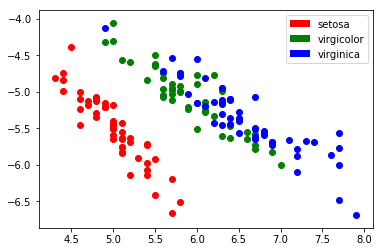

In [89]:
'''
This plot shows the original data taking only the first two columns, technically eigenvectors as 
[1,0,0,0] and [0,1,0,0]. While it does an okay job of seperating, we are totally neglecting the petal.

PCA sees the entire data and then suggests the best 2 eigenvectors (also the orthogonal basis vectors)
for the data by retaining most of the variance. 
'''
plt.scatter(X[:50,0],X2[:50,1],c='r')
plt.scatter(X[50:100,0],X2[50:100,1],c='g')
plt.scatter(X[100:,0],X2[100:,1],c='b')
plt.legend(rec,classes)

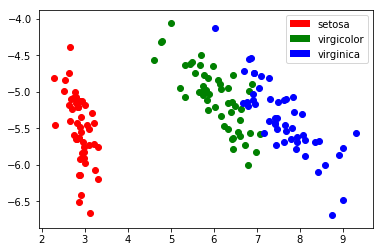

In [90]:
'''
We have plotted the data based on the new feature vectors (or Principle Components). Since it takes
into account all the 4 features, it provides a better classification. 
'''

plt.scatter(X2[:50,0],X2[:50,1],c='r')
plt.scatter(X2[50:100,0],X2[50:100,1],c='g')
plt.scatter(X2[100:,0],X2[100:,1],c='b')
plt.legend(rec,classes)

As seen above, using the new 2D features now, the data can be seperated by methods like logistic regression